In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import datetime
from calendar import monthrange
from time import time
from datetime import datetime
import random
%matplotlib inline

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import docx 
#pip install docx-mailmerge
from mailmerge import MailMerge
#pip install docxtpl
from docxtpl import DocxTemplate
from io import StringIO,BytesIO

from docx.shared import Inches,Cm,Pt,RGBColor

from docx.oxml.ns import nsdecls
from docx.oxml import parse_xml

from docx.oxml.xmlchemy import OxmlElement
from docx.oxml.shared import qn

from docx.enum.text import WD_ALIGN_PARAGRAPH

import colorama
from colorama import Fore, Back, Style

import math


In [3]:
data=pd.read_excel('Medical_Ecommerce1.xlsx')
data.head()

Order ID           Order Date Order Status Organic/Inorganic BDE Name  \
0   145002956  2019-12-24 00:00:00     complete         Inorganic        -   
1   145002956  2019-12-24 00:00:00     complete         Inorganic        -   
2   145003352  2019-12-03 00:00:00     complete         Inorganic        -   
3  1045008642  2019-12-03 00:00:00      pending           Organic        -   
4  1045008643  2019-12-03 00:00:00     complete           Organic        -   

  Department Vertical Customer Name                   Customer Email  \
0          -  Organic  testing team            androforu42@gmail.com   
1          -  Organic  testing team            androforu42@gmail.com   
2          -  Organic       Ashwini       ashwini.j@medikabazaar.com   
3          -  Organic          Glen  glen.gonsalves@medikabazaar.com   
4          -  Organic          Test                   test2@test.com   

  Customer Telephone  ...           State       City Postcode AWB Number  \
0         9768819557  ...  MADHYA PRADESH     MUMBAI   400055          -   
1         9768819557  ...  MADHYA PRADESH     MUMBAI   400055          -   
2         7760630121  ...       KARNATAKA  BANGALORE   560054          -   
3         7400041688  ...     MAHARASHTRA     MUMBAI   400069          -   
4         5656565454  ...     MAHARASHTRA          -   670390          -   

                          Comment      Tag  Carrier type   Zone  \
0       This is test order:Kishor  Testing             -   WEST   
1       This is test order:Kishor  Testing             -   WEST   
2  Testing Order Cancelled:Kishor  Testing             -  SOUTH   
3                               -        -             -   WEST   
4  Testing Order Cancelled:Kishor  Testing             -   WEST   

         Shipment Date  Order Value  
0  2019-12-27 00:00:00       3651.2  
1  2019-12-27 00:00:00       3651.2  
2  2019-12-13 00:00:00       201600  
3                    -       226.43  
4  2019-12-13 00:00:00       2329.6  

[5 rows x 33 columns]

In [4]:
data.shape

(34161, 33)

In [5]:
newdata=data.copy()


In [6]:
newdata.head()

Order ID           Order Date Order Status Organic/Inorganic BDE Name  \
0   145002956  2019-12-24 00:00:00     complete         Inorganic        -   
1   145002956  2019-12-24 00:00:00     complete         Inorganic        -   
2   145003352  2019-12-03 00:00:00     complete         Inorganic        -   
3  1045008642  2019-12-03 00:00:00      pending           Organic        -   
4  1045008643  2019-12-03 00:00:00     complete           Organic        -   

  Department Vertical Customer Name                   Customer Email  \
0          -  Organic  testing team            androforu42@gmail.com   
1          -  Organic  testing team            androforu42@gmail.com   
2          -  Organic       Ashwini       ashwini.j@medikabazaar.com   
3          -  Organic          Glen  glen.gonsalves@medikabazaar.com   
4          -  Organic          Test                   test2@test.com   

  Customer Telephone  ...           State       City Postcode AWB Number  \
0         9768819557  ...  MADHYA PRADESH     MUMBAI   400055          -   
1         9768819557  ...  MADHYA PRADESH     MUMBAI   400055          -   
2         7760630121  ...       KARNATAKA  BANGALORE   560054          -   
3         7400041688  ...     MAHARASHTRA     MUMBAI   400069          -   
4         5656565454  ...     MAHARASHTRA          -   670390          -   

                          Comment      Tag  Carrier type   Zone  \
0       This is test order:Kishor  Testing             -   WEST   
1       This is test order:Kishor  Testing             -   WEST   
2  Testing Order Cancelled:Kishor  Testing             -  SOUTH   
3                               -        -             -   WEST   
4  Testing Order Cancelled:Kishor  Testing             -   WEST   

         Shipment Date  Order Value  
0  2019-12-27 00:00:00       3651.2  
1  2019-12-27 00:00:00       3651.2  
2  2019-12-13 00:00:00       201600  
3                    -       226.43  
4  2019-12-13 00:00:00       2329.6  

[5 rows x 33 columns]

In [7]:
newdata.shape

(34161, 33)

In [8]:
newdata.isnull().sum()

Order ID                0
Order Date              0
Order Status            0
Organic/Inorganic       0
BDE Name                0
Department              0
Vertical                0
Customer Name           0
Customer Email          0
Customer Telephone      0
Active/Inactive         0
Customer Category       0
Product Name            0
SKU                     0
Product Category        0
Product Rate            0
Qty Ordered             0
Qty Invoiced            0
Qty Cancelled           0
Qty Shipped             0
Qty Delivered           0
Qty Refunded            0
Fulfilment Center       0
State                   0
City                    0
Postcode                0
AWB Number            954
Comment                68
Tag                     0
Carrier type            0
Zone                    0
Shipment Date           0
Order Value             0
dtype: int64

In [9]:
newdata.columns

Index(['Order ID', 'Order Date', 'Order Status', 'Organic/Inorganic',
       'BDE Name', 'Department', 'Vertical', 'Customer Name', 'Customer Email',
       'Customer Telephone', 'Active/Inactive', 'Customer Category',
       'Product Name', 'SKU', 'Product Category', 'Product Rate',
       'Qty Ordered', 'Qty Invoiced', 'Qty Cancelled', 'Qty Shipped',
       'Qty Delivered', 'Qty Refunded', 'Fulfilment Center', 'State', 'City',
       'Postcode', 'AWB Number', 'Comment', 'Tag', 'Carrier type', 'Zone',
       'Shipment Date', 'Order Value'],
      dtype='object')

In [10]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34161 entries, 0 to 34160
Data columns (total 33 columns):
Order ID              34161 non-null object
Order Date            34161 non-null object
Order Status          34161 non-null object
Organic/Inorganic     34161 non-null object
BDE Name              34161 non-null object
Department            34161 non-null object
Vertical              34161 non-null object
Customer Name         34161 non-null object
Customer Email        34161 non-null object
Customer Telephone    34161 non-null object
Active/Inactive       34161 non-null object
Customer Category     34161 non-null object
Product Name          34161 non-null object
SKU                   34161 non-null object
Product Category      34161 non-null object
Product Rate          34161 non-null float64
Qty Ordered           34161 non-null float64
Qty Invoiced          34161 non-null int64
Qty Cancelled         34161 non-null int64
Qty Shipped           34161 non-null int64
Qty Delivere

In [11]:
type(newdata['Order Date'])

pandas.core.series.Series

In [12]:
newdata['Order Date'].unique

<bound method Series.unique of 0        2019-12-24 00:00:00
1        2019-12-24 00:00:00
2        2019-12-03 00:00:00
3        2019-12-03 00:00:00
4        2019-12-03 00:00:00
                ...         
34156                      -
34157                      -
34158                      -
34159                      -
34160                      -
Name: Order Date, Length: 34161, dtype: object>

In [13]:
newdata['Order Date']=pd.to_datetime(newdata['Order Date'], errors='coerce')
newdata['month']=newdata['Order Date'].dt.month
newdata['month_str']=newdata['Order Date'].dt.strftime('%b')
newdata.head()

Order ID Order Date Order Status Organic/Inorganic BDE Name Department  \
0   145002956 2019-12-24     complete         Inorganic        -          -   
1   145002956 2019-12-24     complete         Inorganic        -          -   
2   145003352 2019-12-03     complete         Inorganic        -          -   
3  1045008642 2019-12-03      pending           Organic        -          -   
4  1045008643 2019-12-03     complete           Organic        -          -   

  Vertical Customer Name                   Customer Email Customer Telephone  \
0  Organic  testing team            androforu42@gmail.com         9768819557   
1  Organic  testing team            androforu42@gmail.com         9768819557   
2  Organic       Ashwini       ashwini.j@medikabazaar.com         7760630121   
3  Organic          Glen  glen.gonsalves@medikabazaar.com         7400041688   
4  Organic          Test                   test2@test.com         5656565454   

   ... Postcode AWB Number                         Comment      Tag  \
0  ...   400055          -       This is test order:Kishor  Testing   
1  ...   400055          -       This is test order:Kishor  Testing   
2  ...   560054          -  Testing Order Cancelled:Kishor  Testing   
3  ...   400069          -                               -        -   
4  ...   670390          -  Testing Order Cancelled:Kishor  Testing   

  Carrier type   Zone        Shipment Date  Order Value  month  month_str  
0            -   WEST  2019-12-27 00:00:00       3651.2   12.0        Dec  
1            -   WEST  2019-12-27 00:00:00       3651.2   12.0        Dec  
2            -  SOUTH  2019-12-13 00:00:00       201600   12.0        Dec  
3            -   WEST                    -       226.43   12.0        Dec  
4            -   WEST  2019-12-13 00:00:00       2329.6   12.0        Dec  

[5 rows x 35 columns]

In [14]:
#newdata.to_excel("newdata1.xlsx")

In [15]:
now = datetime.now()
current_month = now.month-1 if now.month > 1 else 12
last_month = now.month-2 if now.month > 1 else 12
current_month

6

In [16]:
newdata=newdata[newdata["Customer Name"]!='-']
newdata.shape

(34143, 35)

In [17]:
newdata['Customer Name']=newdata['Customer Name'].apply(lambda x : x.lower())

In [18]:
newdata_current_month=newdata[newdata['month']==current_month]
newdata_current_month.shape

(858, 35)

In [19]:
Total_customers_current_month=newdata_current_month['Customer Name'].nunique()
Total_customers_current_month

110

In [20]:
newdata_last_month=newdata[newdata['month']==last_month]
Total_customers_last_month=len(newdata_last_month['Customer Name'].unique())
Total_customers_last_month

747

In [21]:
len(newdata_last_month.groupby('Customer Name')['Customer Name'].nunique())

747

In [22]:
#now.year

In [23]:
#now.month

In [24]:
def last_day_of_month(date_value):
    return date_value.replace(day = monthrange(date_value.year, date_value.month)[1])

given_date =datetime(year=now.year, month=now.month-1, day=1).date()
print(last_day_of_month(given_date))

2020-06-30


In [25]:
first_date_year =datetime(year=now.year, month=1, day=1).date()
first_date_year

datetime.date(2020, 1, 1)

In [26]:
#https://www.mytecbits.com/internet/python/first-day-of-the-month

YTD_newdata=newdata[(newdata['Order Date']>=first_date_year) & (newdata['Order Date']<=last_day_of_month(given_date))]

In [27]:
#YTD_newdata.head()

In [28]:
#YTD_newdata['Customer Name']=YTD_newdata['Customer Name'].apply(lambda x : x.lower())

In [29]:
YTD_newdata.shape

(30838, 35)

In [30]:
Total_customers_YTD=YTD_newdata['Customer Name'].nunique()
Total_customers_YTD

2234

# New Customers Logic

In [31]:
#newdata_current_month.head()

In [32]:
new_customers_data=newdata[newdata['month']!=current_month]
#new_customers_data.shape


In [33]:
new_customers_data["Customer Name"].unique()

array(['testing team', 'ashwini', 'glen', ..., 'antriksh', 'dr bhagwat',
       'dr. anshul'], dtype=object)

In [34]:
#len(newdata_current_month["Customer Name"].unique())

In [35]:
new_customers_current_month=[]
for i in newdata_current_month["Customer Name"].unique():
    if i not in new_customers_data["Customer Name"].unique():
        new_customers_current_month.append(i)
    



In [36]:
new_customers_current_M=len(new_customers_current_month)
new_customers_current_M

30

In [37]:
new_customer_current_M_prop=str(round(((new_customers_current_M / Total_customers_current_month)*100),2))+" "+"%"
new_customer_current_M_prop

'27.27 %'

In [38]:
str(new_customers_current_M)+" : "+ "(" + new_customer_current_M_prop +")"

'30 : (27.27 %)'

In [39]:
#newdata_last_month.head()

In [40]:
new_customers_last_data=newdata[(newdata['month']!=last_month) & (newdata['month']!=current_month)]
new_customers_last_data.shape

(28221, 35)

In [41]:
new_customers_last_month=[]
for i in newdata_last_month["Customer Name"].unique():
    if i not in new_customers_last_data["Customer Name"].unique():
        new_customers_last_month.append(i)

In [42]:
new_customers_last_M=len(new_customers_last_month)
new_customers_last_M

399

In [43]:
new_customer_last_M_prop=str(round(((new_customers_last_M / Total_customers_last_month)*100),2))+" "+"%"
new_customer_last_M_prop

'53.41 %'

In [44]:
str(new_customers_last_M)+" : "+"("+ new_customer_last_M_prop+ ")"

'399 : (53.41 %)'

In [45]:
first_date=newdata["Order Date"].min().date()

In [46]:
YTD_newdata=newdata[(newdata['Order Date']>=first_date_year) & (newdata['Order Date']<=last_day_of_month(given_date))]

In [47]:
NO_YTD_newdata=newdata[(newdata['Order Date']>=first_date) & (newdata['Order Date']<first_date_year)]
#NO_YTD_newdata.head()

In [48]:
new_customers_YTD=[]
for i in YTD_newdata['Customer Name'].unique():
    if i not in NO_YTD_newdata["Customer Name"].unique():
        new_customers_YTD.append(i)

In [49]:
new_customers_Y=len(new_customers_YTD)
new_customers_Y

1942

In [50]:
new_customer_Y_prop=str(round(((new_customers_Y / Total_customers_YTD)*100),2))+" "+"%"
new_customer_Y_prop

'86.93 %'

In [51]:
str(new_customers_Y)+" : "+"("+ new_customer_Y_prop+")"

'1942 : (86.93 %)'

# Pie charts 

In [52]:
''' pielabels=['Organic', 'Logistics', 'Direct Sales', 'Strategic Alliances','Inside Sales', 'Technology', 'Medical Innovations Business','Dental Lab', 'Catalog & Category', 'CEOs Office','Corporate sales']
colors=['tan','Red','Green','Yellow','blue','purple','gray','Orange','brown','lightgreen','mediumpurple']
labels=list(pielabels)
fig,ax=plt.subplots(1,3,figsize=(15,8))
data=newdata.loc[newdata['month']==current_month].groupby('Vertical')['Customer Name'].nunique()
ax[0].pie(data,autopct="%1.1f%%",colors=colors)
data1=newdata.loc[newdata['month']==last_month].groupby('Vertical')['Customer Name'].nunique()
ax[1].pie(data1,autopct="%1.1f%%",colors=colors)
data2=newdata[(newdata['Order Date']>=first_date_year) & (newdata['Order Date']<=last_day_of_month(given_date))].groupby('Vertical')['Customer Name'].nunique()
ax[2].pie(data2,autopct="%1.1f%%",colors=colors)


plt.figlegend(labels=labels, loc = 'lower center',ncol=5, labelspacing=0.) 
plt.show() '''


' pielabels=[\'Organic\', \'Logistics\', \'Direct Sales\', \'Strategic Alliances\',\'Inside Sales\', \'Technology\', \'Medical Innovations Business\',\'Dental Lab\', \'Catalog & Category\', \'CEOs Office\',\'Corporate sales\']\ncolors=[\'tan\',\'Red\',\'Green\',\'Yellow\',\'blue\',\'purple\',\'gray\',\'Orange\',\'brown\',\'lightgreen\',\'mediumpurple\']\nlabels=list(pielabels)\nfig,ax=plt.subplots(1,3,figsize=(15,8))\ndata=newdata.loc[newdata[\'month\']==current_month].groupby(\'Vertical\')[\'Customer Name\'].nunique()\nax[0].pie(data,autopct="%1.1f%%",colors=colors)\ndata1=newdata.loc[newdata[\'month\']==last_month].groupby(\'Vertical\')[\'Customer Name\'].nunique()\nax[1].pie(data1,autopct="%1.1f%%",colors=colors)\ndata2=newdata[(newdata[\'Order Date\']>=first_date_year) & (newdata[\'Order Date\']<=last_day_of_month(given_date))].groupby(\'Vertical\')[\'Customer Name\'].nunique()\nax[2].pie(data2,autopct="%1.1f%%",colors=colors)\n\n\nplt.figlegend(labels=labels, loc = \'lower center\

In [53]:
#data_df=pd.DataFrame({'LMTD':values_last_month,'MTD':values_current_month,'YTD':values_YTD,'Vertical':labels_YTD})
#data_df

In [54]:
newdata_current_month1=pd.DataFrame(newdata.loc[newdata['month']==current_month].groupby('Vertical')['Customer Name'].nunique()).reset_index()
values_current_month=list(newdata_current_month1['Customer Name'])
labels_current_month=list(newdata_current_month1['Vertical'])
print(values_current_month)
print(labels_current_month)

[2, 66, 6, 1, 9, 27]
['Catalog & Category', 'Direct Sales', 'Inside Sales', 'Logistics', 'Organic', 'Strategic Alliances']


In [55]:
newdata_last_month1=pd.DataFrame(newdata.loc[newdata['month']==last_month].groupby('Vertical')['Customer Name'].nunique()).reset_index()
values_last_month=list(newdata_last_month1['Customer Name'])
labels_last_month=list(newdata_last_month1['Vertical'])
print(values_last_month)
print(labels_last_month)




[18, 1, 454, 57, 2, 17, 79, 124, 6]
['Catalog & Category', 'Corporate sales', 'Direct Sales', 'Inside Sales', 'Logistics', 'Medical Innovations Business', 'Organic', 'Strategic Alliances', 'Technology']


In [56]:
YTD_newdata1=newdata[(newdata['Order Date']>=first_date_year) & (newdata['Order Date']<=last_day_of_month(given_date))].groupby('Vertical')['Customer Name'].nunique().reset_index()
values_YTD=list(YTD_newdata1['Customer Name'])
labels_YTD=list(YTD_newdata1['Vertical'])
print(values_YTD)
print(labels_YTD)

[1, 40, 3, 5, 1248, 233, 9, 84, 362, 354, 13]
['CEOs Office', 'Catalog & Category', 'Corporate sales', 'Dental Lab', 'Direct Sales', 'Inside Sales', 'Logistics', 'Medical Innovations Business', 'Organic', 'Strategic Alliances', 'Technology']


In [57]:
#https://plotly.com/python/pie-charts/#pie-charts-in-subplots

plt.figure()
fig=make_subplots(1,3,specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]],subplot_titles=['LMTD','MTD','YTD'])
fig.add_trace(go.Pie(labels=labels_last_month,values=values_last_month),1,1)
fig.add_trace(go.Pie(labels=labels_current_month,values=values_current_month),1,2)
fig.add_trace(go.Pie(labels=labels_YTD,values=values_YTD),1,3)
#fig.update_layout(title_text='For Business Unit:')
fig.show()
fig.write_image(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\customers_pie1.png')

<Figure size 432x288 with 0 Axes>

# New/old customer wise order value

In [58]:
#new_customers_current_month

In [59]:
newdata_current_month["Customer_Name_tag"]=newdata_current_month["Customer Name"].isin(new_customers_current_month).astype(int)

In [60]:
#newdata_current_month.to_excel("newdata_current_month1.xlsx")

In [61]:
#newdata_current_month.head()

In [62]:
newdata_current_month_prop=pd.DataFrame(newdata_current_month.groupby(["Customer Name","Order ID"])["Order Value"].max()).reset_index()
newdata_current_month_prop

Customer Name      Order ID  Order Value
0                                 abhishek  OM1047004609    2091.0000
1                                 abhishek  OM1047004612    4307.0000
2                                      abz  OM1047004511   91197.5994
3                                      abz  OM1047004513   86604.0000
4                                     ajay  OM1047004626    6424.4800
..                                     ...           ...          ...
158      vikram hospital bengaluru pvt ltd  OM1047004566   16020.8160
159      vikram hospital bengaluru pvt ltd  OM1047004568  538785.1980
160      vikram hospital bengaluru pvt ltd  OM1047004600   58183.2496
161  vishwanethra health services pvt.ltd.  OM1047004585    4144.0000
162                          william pinto  OM1047004538    1344.0000

[163 rows x 3 columns]

In [63]:
Total_Order_Value=(newdata_current_month_prop["Order Value"].sum()/100000).round(2)

In [64]:
newdata_current_month_newCust=newdata_current_month[newdata_current_month["Customer_Name_tag"]==1]
#newdata_current_month_newCust.shape

In [65]:
newdata_current_month_oldCust=newdata_current_month[newdata_current_month["Customer_Name_tag"]==0]
#newdata_current_month_oldCust.shape

In [66]:
newdata_current_month_newCust1=pd.DataFrame(newdata_current_month_newCust.groupby(["Customer Name","Order ID"])["Order Value"].max()).reset_index()
#newdata_current_month_newCust1

In [67]:
new_cust_prop=str((((newdata_current_month_newCust1["Order Value"].sum()/100000).round(2)/Total_Order_Value)*100).round(2))

In [68]:
str((newdata_current_month_newCust1["Order Value"].sum()/100000).round(2))+""+"Cr"+" : "+'('+new_cust_prop+""+"%"+")"

'4.55Cr : (8.49%)'

In [69]:
b=(str(new_cust_prop)+""+'%',)
b

('8.49%',)

In [70]:
b1=str(new_cust_prop)+" "+'%'
b2=str(Fore.RED) + b1
print(b2)

8.49 %


In [71]:
str((newdata_current_month_newCust1["Order Value"].sum()/100000).round(2))+""+"Cr"+" : "+b2

'4.55Cr : \x1b8.49 %'

In [72]:
str((newdata_current_month_newCust1["Order Value"].sum()/100000).round(2))+""+"Cr"+""+str(b)

"4.55Cr('8.49%',)"

In [73]:
newdata_current_month_oldCust1=pd.DataFrame(newdata_current_month_oldCust.groupby(["Customer Name","Order ID"])["Order Value"].max()).reset_index()
#newdata_current_month_oldCust1

In [74]:
old_cust_prop=(((newdata_current_month_oldCust1["Order Value"].sum()/100000).round(2)/Total_Order_Value)*100).round(2)

In [75]:
a=(str(old_cust_prop)+""+'%',)
a

('91.51%',)

In [76]:
str((newdata_current_month_oldCust1["Order Value"].sum()/100000).round(2))+""+"Cr"+""+str(a)

"49.04Cr('91.51%',)"

# Pivot Table

In [77]:
#YTD_newdata.head()

In [78]:
YTD_newdata_new=YTD_newdata.copy()
#YTD_newdata_new

In [79]:
def period_fuct(df):
    if df["month"]==current_month:
        return "MTD"
    elif df["month"]==current_month-1:
        return "LMTD"
    else:
        return "YTD"
YTD_newdata_new["Period"]=YTD_newdata_new.apply(lambda df:period_fuct(df),axis=1)

In [80]:
#YTD_newdata_new.to_excel('YTD_newdata_new1.xlsx')

In [81]:
#YTD_newdata_new.groupby(['Customer Category','Period'])["Order ID"].nunique()

In [82]:
newdata_current_month.head()

Order ID Order Date Order Status Organic/Inorganic BDE Name  \
1772  1045010214 2020-06-01      pending           Organic        -   
1773  1045010214 2020-06-01      pending           Organic        -   
1774  1045010214 2020-06-01      pending           Organic        -   
1775  1045010214 2020-06-01      pending           Organic        -   
1776  1045010215 2020-06-01      pending           Organic        -   

     Department Vertical Customer Name             Customer Email  \
1772          -  Organic          qais  centreofholy786@gmail.com   
1773          -  Organic          qais  centreofholy786@gmail.com   
1774          -  Organic          qais  centreofholy786@gmail.com   
1775          -  Organic          qais  centreofholy786@gmail.com   
1776          -  Organic         sahil       dr.monga11@gmail.com   

     Customer Telephone  ... AWB Number Comment Tag Carrier type   Zone  \
1772        09419488474  ...          -       -   -            -  NORTH   
1773        09419488474  ...          -       -   -            -  NORTH   
1774        09419488474  ...          -       -   -            -  NORTH   
1775        09419488474  ...          -       -   -            -  NORTH   
1776         9914091211  ...          -       -   -            -  NORTH   

      Shipment Date  Order Value  month  month_str  Customer_Name_tag  
1772              -       638.24    6.0        Jun                  1  
1773              -       638.24    6.0        Jun                  1  
1774              -       638.24    6.0        Jun                  1  
1775              -       638.24    6.0        Jun                  1  
1776              -      1030.14    6.0        Jun                  0  

[5 rows x 36 columns]

In [83]:
newdata_current_month["Period"]=newdata_current_month.apply(lambda df:period_fuct(df),axis=1)
newdata_current_month.head()

Order ID Order Date Order Status Organic/Inorganic BDE Name  \
1772  1045010214 2020-06-01      pending           Organic        -   
1773  1045010214 2020-06-01      pending           Organic        -   
1774  1045010214 2020-06-01      pending           Organic        -   
1775  1045010214 2020-06-01      pending           Organic        -   
1776  1045010215 2020-06-01      pending           Organic        -   

     Department Vertical Customer Name             Customer Email  \
1772          -  Organic          qais  centreofholy786@gmail.com   
1773          -  Organic          qais  centreofholy786@gmail.com   
1774          -  Organic          qais  centreofholy786@gmail.com   
1775          -  Organic          qais  centreofholy786@gmail.com   
1776          -  Organic         sahil       dr.monga11@gmail.com   

     Customer Telephone  ... Comment Tag Carrier type   Zone Shipment Date  \
1772        09419488474  ...       -   -            -  NORTH             -   
1773        09419488474  ...       -   -            -  NORTH             -   
1774        09419488474  ...       -   -            -  NORTH             -   
1775        09419488474  ...       -   -            -  NORTH             -   
1776         9914091211  ...       -   -            -  NORTH             -   

      Order Value  month  month_str  Customer_Name_tag  Period  
1772       638.24    6.0        Jun                  1     MTD  
1773       638.24    6.0        Jun                  1     MTD  
1774       638.24    6.0        Jun                  1     MTD  
1775       638.24    6.0        Jun                  1     MTD  
1776      1030.14    6.0        Jun                  0     MTD  

[5 rows x 37 columns]

In [84]:
df_MTD=pd.DataFrame(newdata_current_month.groupby(["Customer Category","Period"])["Order ID"].nunique()).reset_index()

In [85]:
df_MTD.rename(columns={"Order ID":"Order Count"},inplace=True)

In [86]:
#pd.pivot_table(df_MTD,index=["Customer Category"],columns=["Period"],values=["Order Count"])

In [87]:
df1=pd.DataFrame(newdata_current_month.groupby(["Customer Category","Order ID","Period"])["Order Value"].max()).reset_index()
df1_1=pd.DataFrame(df1.groupby(["Customer Category","Period"])["Order Value"].sum().round()).reset_index()
#df1_1

In [88]:
df_MTD=df_MTD.merge(df1_1)
#df_MTD

In [89]:
df_MTD["%"]=round((df_MTD["Order Value"]/sum(df_MTD["Order Value"]))*100)
df_MTD

Customer Category Period  Order Count  Order Value     %
0                     Dental Center    MTD           16     119190.0   2.0
1     Doctor / Medical Professional    MTD           27     186535.0   3.0
2                           General    MTD            4     238253.0   4.0
3          Healthcare Professionals    MTD            1       1914.0   0.0
4  Hospital / Medical Establishment    MTD           85    4407051.0  82.0
5     Medical Suppliers / Resellers    MTD           27     383696.0   7.0
6  Proprietary / Partnership / Comp    MTD            2      15723.0   0.0
7    Trade Buyers/Resellers/Distrib    MTD            1       6424.0   0.0

In [90]:
pd.pivot_table(df_MTD,index=["Customer Category"],values=["Order Count","Order Value","%"],columns=["Period"])

% Order Count Order Value
Period                             MTD         MTD         MTD
Customer Category                                             
Dental Center                      2.0          16    119190.0
Doctor / Medical Professional      3.0          27    186535.0
General                            4.0           4    238253.0
Healthcare Professionals           0.0           1      1914.0
Hospital / Medical Establishment  82.0          85   4407051.0
Medical Suppliers / Resellers      7.0          27    383696.0
Proprietary / Partnership / Comp   0.0           2     15723.0
Trade Buyers/Resellers/Distrib     0.0           1      6424.0

In [91]:



newdata_last_month["Period"]=newdata_last_month.apply(lambda df:period_fuct(df),axis=1)
#newdata_last_month.head()

In [92]:
df_LMTD=pd.DataFrame(newdata_last_month.groupby(["Customer Category","Period"])["Order ID"].nunique()).reset_index()
df_LMTD.rename(columns={"Order ID":"Order Count"},inplace=True)

df1_LMTD=pd.DataFrame(newdata_last_month.groupby(["Customer Category","Order ID","Period"])["Order Value"].max()).reset_index()
df1_1_LMTD=pd.DataFrame(df1_LMTD.groupby(["Customer Category","Period"])["Order Value"].sum().round()).reset_index()
#df1_1_LMTD

df_LMTD=df_LMTD.merge(df1_1_LMTD)
#df_LMTD

df_LMTD["%"]=round((df_LMTD["Order Value"]/sum(df_LMTD["Order Value"]))*100)
pd.pivot_table(df_LMTD,index=["Customer Category"],values=["Order Count","Order Value","%"],columns=["Period"])

% Order Count Order Value
Period                            LMTD        LMTD        LMTD
Customer Category                                             
Dental Center                      5.0         183   7089963.0
Doctor / Medical Professional      9.0         303  12377740.0
General                            3.0          37   3991848.0
Healthcare Professionals           0.0           5    504779.0
Hospital / Medical Establishment  55.0         630  73749020.0
Medical Suppliers / Resellers     22.0         266  29110246.0
Proprietary / Partnership / Comp   4.0          54   4839298.0
Trade Buyers/Resellers/Distrib     1.0          32   1232348.0
Veterinarian                       0.0           5     10097.0
Veterinary clinic                  0.0           1      3080.0
Veterinary hospital                0.0           1    183284.0

In [93]:
YTD_newdata.shape

(30838, 35)

In [94]:
YTD_newdata["Period"]="YTD"

In [95]:
YTD_newdata.shape

(30838, 36)

In [96]:
df_YTD=pd.DataFrame(YTD_newdata.groupby(["Customer Category","Period"])["Order ID"].nunique()).reset_index()
df_YTD.rename(columns={"Order ID":"Order Count"},inplace=True)

df1_YTD=pd.DataFrame(YTD_newdata.groupby(["Customer Category","Order ID","Period"])["Order Value"].max()).reset_index()
df1_1_YTD=pd.DataFrame(df1_YTD.groupby(["Customer Category","Period"])["Order Value"].sum().round()).reset_index()
#df1_1_YTD

df_YTD=df_YTD.merge(df1_1_YTD)
#df_YTD

df_YTD["%"]=round((df_YTD["Order Value"]/sum(df_YTD["Order Value"]))*100)
pd.pivot_table(df_YTD,index=["Customer Category"],values=["Order Count","Order Value","%"],columns=["Period"])


% Order Count  Order Value
Period                             YTD         YTD          YTD
Customer Category                                              
Dental Center                      3.0         734   27248649.0
Doctor / Medical Professional      8.0        1439   82492924.0
General                            2.0         197   24369714.0
Healthcare Professionals           0.0          49    4905433.0
Hospital / Medical Establishment  59.0        3562  581373226.0
Medical Suppliers / Resellers     22.0        1083  212607779.0
Proprietary / Partnership / Comp   1.0         178   11050956.0
Trade Buyers/Resellers/Distrib     4.0          88   39210403.0
Vendor                             0.0           5     588000.0
Veterinarian                       0.0           8     129820.0
Veterinary clinic                  0.0           2       6171.0
Veterinary hospital                0.0           8     199607.0

In [97]:
df_2=df_YTD.append(df_LMTD,ignore_index=True)
df_orders=df_2.append(df_MTD,ignore_index=True)
#df_orders

In [98]:
df_orders=pd.pivot_table(data=df_orders,index=["Customer Category"],columns=["Period"],values=["Order Count","Order Value","%"]).fillna(0)
df_orders

%             Order Count                \
Period                            LMTD   MTD   YTD        LMTD   MTD     YTD   
Customer Category                                                              
Dental Center                      5.0   2.0   3.0       183.0  16.0   734.0   
Doctor / Medical Professional      9.0   3.0   8.0       303.0  27.0  1439.0   
General                            3.0   4.0   2.0        37.0   4.0   197.0   
Healthcare Professionals           0.0   0.0   0.0         5.0   1.0    49.0   
Hospital / Medical Establishment  55.0  82.0  59.0       630.0  85.0  3562.0   
Medical Suppliers / Resellers     22.0   7.0  22.0       266.0  27.0  1083.0   
Proprietary / Partnership / Comp   4.0   0.0   1.0        54.0   2.0   178.0   
Trade Buyers/Resellers/Distrib     1.0   0.0   4.0        32.0   1.0    88.0   
Vendor                             0.0   0.0   0.0         0.0   0.0     5.0   
Veterinarian                       0.0   0.0   0.0         5.0   0.0     8.0   
Veterinary clinic                  0.0   0.0   0.0         1.0   0.0     2.0   
Veterinary hospital                0.0   0.0   0.0         1.0   0.0     8.0   

                                 Order Value                          
Period                                  LMTD        MTD          YTD  
Customer Category                                                     
Dental Center                      7089963.0   119190.0   27248649.0  
Doctor / Medical Professional     12377740.0   186535.0   82492924.0  
General                            3991848.0   238253.0   24369714.0  
Healthcare Professionals            504779.0     1914.0    4905433.0  
Hospital / Medical Establishment  73749020.0  4407051.0  581373226.0  
Medical Suppliers / Resellers     29110246.0   383696.0  212607779.0  
Proprietary / Partnership / Comp   4839298.0    15723.0   11050956.0  
Trade Buyers/Resellers/Distrib     1232348.0     6424.0   39210403.0  
Vendor                                   0.0        0.0     588000.0  
Veterinarian                         10097.0        0.0     129820.0  
Veterinary clinic                     3080.0        0.0       6171.0  
Veterinary hospital                 183284.0        0.0     199607.0

In [99]:
df_orders=df_orders.reset_index()
df_orders

Customer Category     %             Order Count        \
Period                                    LMTD   MTD   YTD        LMTD   MTD   
0                          Dental Center   5.0   2.0   3.0       183.0  16.0   
1          Doctor / Medical Professional   9.0   3.0   8.0       303.0  27.0   
2                                General   3.0   4.0   2.0        37.0   4.0   
3               Healthcare Professionals   0.0   0.0   0.0         5.0   1.0   
4       Hospital / Medical Establishment  55.0  82.0  59.0       630.0  85.0   
5          Medical Suppliers / Resellers  22.0   7.0  22.0       266.0  27.0   
6       Proprietary / Partnership / Comp   4.0   0.0   1.0        54.0   2.0   
7         Trade Buyers/Resellers/Distrib   1.0   0.0   4.0        32.0   1.0   
8                                 Vendor   0.0   0.0   0.0         0.0   0.0   
9                           Veterinarian   0.0   0.0   0.0         5.0   0.0   
10                     Veterinary clinic   0.0   0.0   0.0         1.0   0.0   
11                   Veterinary hospital   0.0   0.0   0.0         1.0   0.0   

               Order Value                          
Period     YTD        LMTD        MTD          YTD  
0        734.0   7089963.0   119190.0   27248649.0  
1       1439.0  12377740.0   186535.0   82492924.0  
2        197.0   3991848.0   238253.0   24369714.0  
3         49.0    504779.0     1914.0    4905433.0  
4       3562.0  73749020.0  4407051.0  581373226.0  
5       1083.0  29110246.0   383696.0  212607779.0  
6        178.0   4839298.0    15723.0   11050956.0  
7         88.0   1232348.0     6424.0   39210403.0  
8          5.0         0.0        0.0     588000.0  
9          8.0     10097.0        0.0     129820.0  
10         2.0      3080.0        0.0       6171.0  
11         8.0    183284.0        0.0     199607.0

In [100]:
df_orders.columns

MultiIndex([('Customer Category',     ''),
            (                '%', 'LMTD'),
            (                '%',  'MTD'),
            (                '%',  'YTD'),
            (      'Order Count', 'LMTD'),
            (      'Order Count',  'MTD'),
            (      'Order Count',  'YTD'),
            (      'Order Value', 'LMTD'),
            (      'Order Value',  'MTD'),
            (      'Order Value',  'YTD')],
           names=[None, 'Period'])

In [101]:
df_orders=pd.DataFrame(df_orders,columns=[df_orders.columns[0],df_orders.columns[4],df_orders.columns[7],df_orders.columns[1],
                                                     df_orders.columns[5],df_orders.columns[8],df_orders.columns[2],
                                                     df_orders.columns[6],df_orders.columns[9],df_orders.columns[3] ])
#df_orders=pd.DataFrame(df_orders,columns=[df_orders.columns[3],df_orders.columns[6],df_orders.columns[0],
                                                     #df_orders.columns[4],df_orders.columns[7],df_orders.columns[1],
                                                     #df_orders.columns[5],df_orders.columns[8],df_orders.columns[2] ] )

In [102]:
df_orders

Customer Category Order Count Order Value     %  \
Period                                          LMTD        LMTD  LMTD   
0                          Dental Center       183.0   7089963.0   5.0   
1          Doctor / Medical Professional       303.0  12377740.0   9.0   
2                                General        37.0   3991848.0   3.0   
3               Healthcare Professionals         5.0    504779.0   0.0   
4       Hospital / Medical Establishment       630.0  73749020.0  55.0   
5          Medical Suppliers / Resellers       266.0  29110246.0  22.0   
6       Proprietary / Partnership / Comp        54.0   4839298.0   4.0   
7         Trade Buyers/Resellers/Distrib        32.0   1232348.0   1.0   
8                                 Vendor         0.0         0.0   0.0   
9                           Veterinarian         5.0     10097.0   0.0   
10                     Veterinary clinic         1.0      3080.0   0.0   
11                   Veterinary hospital         1.0    183284.0   0.0   

       Order Count Order Value     % Order Count  Order Value     %  
Period         MTD         MTD   MTD         YTD          YTD   YTD  
0             16.0    119190.0   2.0       734.0   27248649.0   3.0  
1             27.0    186535.0   3.0      1439.0   82492924.0   8.0  
2              4.0    238253.0   4.0       197.0   24369714.0   2.0  
3              1.0      1914.0   0.0        49.0    4905433.0   0.0  
4             85.0   4407051.0  82.0      3562.0  581373226.0  59.0  
5             27.0    383696.0   7.0      1083.0  212607779.0  22.0  
6              2.0     15723.0   0.0       178.0   11050956.0   1.0  
7              1.0      6424.0   0.0        88.0   39210403.0   4.0  
8              0.0         0.0   0.0         5.0     588000.0   0.0  
9              0.0         0.0   0.0         8.0     129820.0   0.0  
10             0.0         0.0   0.0         2.0       6171.0   0.0  
11             0.0         0.0   0.0         8.0     199607.0   0.0

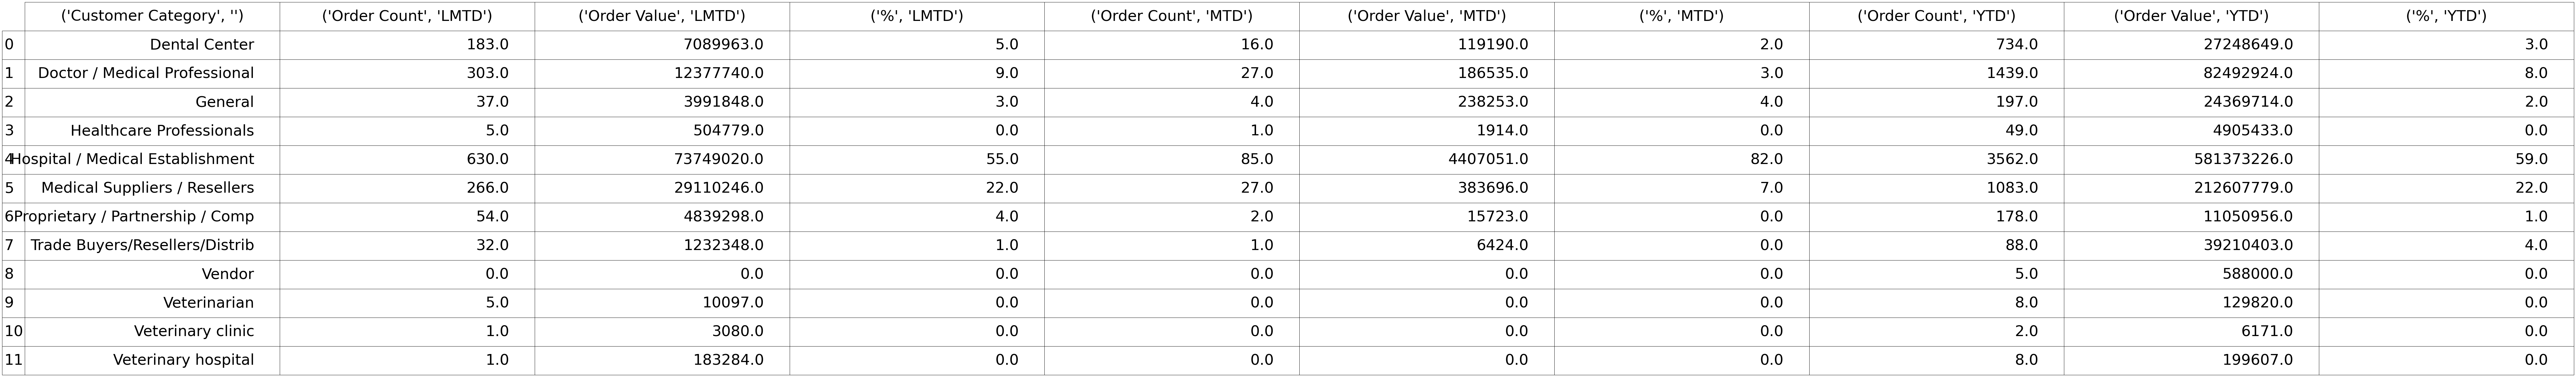

In [106]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

tabla=table(ax, df_orders,rowLabels=['']*df_orders.shape[0], colWidths=[0.17]*len(df_orders.columns),loc='center')
# where df is your data frame
#tabla=table(ax, df_orders,loc='center')
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.scale(15, 8)
tabla.set_fontsize(50) # if ++fontsize is necessary ++colWidths

plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\pivot_table.png')#,transparent=True

# Top 10 customers By value:

In [107]:
newdata_current_month.head()

Order ID Order Date Order Status Organic/Inorganic BDE Name  \
1772  1045010214 2020-06-01      pending           Organic        -   
1773  1045010214 2020-06-01      pending           Organic        -   
1774  1045010214 2020-06-01      pending           Organic        -   
1775  1045010214 2020-06-01      pending           Organic        -   
1776  1045010215 2020-06-01      pending           Organic        -   

     Department Vertical Customer Name             Customer Email  \
1772          -  Organic          qais  centreofholy786@gmail.com   
1773          -  Organic          qais  centreofholy786@gmail.com   
1774          -  Organic          qais  centreofholy786@gmail.com   
1775          -  Organic          qais  centreofholy786@gmail.com   
1776          -  Organic         sahil       dr.monga11@gmail.com   

     Customer Telephone  ... Comment Tag Carrier type   Zone Shipment Date  \
1772        09419488474  ...       -   -            -  NORTH             -   
1773        09419488474  ...       -   -            -  NORTH             -   
1774        09419488474  ...       -   -            -  NORTH             -   
1775        09419488474  ...       -   -            -  NORTH             -   
1776         9914091211  ...       -   -            -  NORTH             -   

      Order Value  month  month_str  Customer_Name_tag  Period  
1772       638.24    6.0        Jun                  1     MTD  
1773       638.24    6.0        Jun                  1     MTD  
1774       638.24    6.0        Jun                  1     MTD  
1775       638.24    6.0        Jun                  1     MTD  
1776      1030.14    6.0        Jun                  0     MTD  

[5 rows x 37 columns]

In [108]:
df1=pd.DataFrame(newdata_current_month.groupby(["Customer Name","Order ID"])["Order Value"].max()).reset_index()
df_10=pd.DataFrame((df1.groupby("Customer Name")["Order Value"].sum()/10000000).round(3)).reset_index().sort_values(by=["Order Value"],ascending=False).iloc[0:10]
df_10

Customer Name  Order Value
107                  vikram hospital bengaluru pvt ltd        0.188
64                     new delhi centre for sight ltd.        0.027
55                              motherhood indiranagar        0.022
41                   jaslok hospital & research centre        0.021
1                                                  abz        0.018
57                        motherhood sahakar nagar- ip        0.018
14   dentsu aegis network communications india priv...        0.015
81                           rhea pharma-ip (sarjapur)        0.013
30         dsr healthcare pvt ltd motherhood (chennai)        0.013
52            meqte sales and services private limited        0.013

In [109]:
#https://plotly.com/python/bar-charts/#controlling-text-fontsize-with-uniformtext

colors=['Blue','Red','Green','purple','orange','lightblue','pink','lighgreen','middlepurple','yellow']
fig=px.bar(df_10,x="Customer Name",y="Order Value",text="Order Value",color=colors)
fig.update_traces(texttemplate='%{text:.4s}', textposition='auto')
fig.update_layout(xaxis_title=None,yaxis_title=None,showlegend= False)
fig.show()
#title={'text':"Top 10 Customers by Value",'yanchor': 'top','xanchor': 'left'},
fig.write_image(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\Top 10 Cust by Order Value.png')

In [110]:
cust_list=[]
for i in df_10["Customer Name"]:
    cust_list.append(i)
cust_list
value_list=[]
for j in df_10["Order Value"]:
    value_list.append(j)
value_list

[0.188, 0.027, 0.022, 0.021, 0.018, 0.018, 0.015, 0.013, 0.013, 0.013]

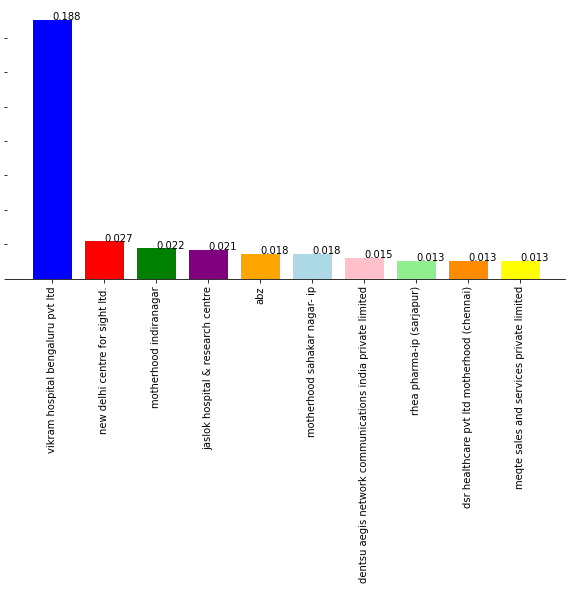

In [111]:

plt.figure(figsize=(10,5))
colors=['Blue','Red','Green','purple','orange','lightblue','pink','lightgreen','darkorange','yellow']
barwidth=0.75
ax=plt.subplot(111)
#low = min(value_list)
#high = max(value_list)
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.bar(df_10["Customer Name"],df_10["Order Value"],color=colors,width=barwidth)
plt.xticks([r  for r in range(len(df_10["Customer Name"]))],cust_list,rotation=90)
for i in range(len(df_10["Order Value"])):
    ax.text(x=cust_list[i],y=value_list[i],s=value_list[i])
#plt.subplots_adjust(bottom= 0.2, top = 0.98)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_yticklabels([])
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\Top 10 Cust by Order Value.png',bbox_inches='tight',dpi=100)
plt.show()

# Top 10 Customers Trend Analysis

In [112]:
#YTD_newdata.head()

In [113]:
df_YTD_10=pd.DataFrame(YTD_newdata.groupby(["month","month_str","Customer Name","Order ID"])["Order Value"].max()).reset_index()
df_YTD_10=df_YTD_10.sort_values(by=["month"],ascending=True)
#df_YTD_10

In [114]:
df_YTD_10_1=pd.DataFrame(df_YTD_10.groupby(["month","month_str","Customer Name"])["Order Value"].sum().round()/10000000).reset_index()
#df_YTD_10_1

In [115]:
df_YTD_10_2=pd.DataFrame(df_YTD_10_1.groupby(["month","month_str"])["Order Value"].nlargest(10)).reset_index()
df_YTD_10_2.drop("level_2",axis=1,inplace=True)

In [116]:
#df_YTD_10_2

In [117]:
df_YTD_10_3=pd.merge(df_YTD_10_2,df_YTD_10_1,on="Order Value",how="inner")
#df_YTD_10_3

In [118]:
df_YTD_10_3[df_YTD_10_3["month_str_x"]!=df_YTD_10_3["month_str_y"]].index

Int64Index([56], dtype='int64')

In [119]:
for i in df_YTD_10_3[df_YTD_10_3["month_str_x"]!=df_YTD_10_3["month_str_y"]].index:
    df_YTD_10_3.drop(i,inplace=True)

In [120]:
df_YTD_10_3.drop(["month_str_y","month_y"],axis=1,inplace=True)


In [121]:
df_YTD_10_3.rename(columns={"month_str_x":"Month Name","month_x":"Month"},inplace=True)
#df_YTD_10_3

In [122]:
df_YTD_10_3["Customer Name"].nunique()

44

In [123]:
#df_YTD_10_3

In [124]:
#df_10

In [125]:
d=df_YTD_10_3[(df_YTD_10_3["Month"]==current_month)]
#d

In [126]:
df_cust_trend=pd.merge(d,df_YTD_10_3,on="Customer Name",how="left").drop(["Month_x","Month Name_x","Order Value_x"],axis=1).rename(columns={"Month_y":"Month","Month Name_y":"Month Name","Order Value_y":"Order Value"})

In [128]:
df_cust_trend

Customer Name  Month Month Name  \
0                   vikram hospital bengaluru pvt ltd    1.0        Jan   
1                   vikram hospital bengaluru pvt ltd    2.0        Feb   
2                   vikram hospital bengaluru pvt ltd    3.0        Mar   
3                   vikram hospital bengaluru pvt ltd    4.0        Apr   
4                   vikram hospital bengaluru pvt ltd    5.0        May   
5                   vikram hospital bengaluru pvt ltd    6.0        Jun   
6                     new delhi centre for sight ltd.    6.0        Jun   
7                              motherhood indiranagar    6.0        Jun   
8                   jaslok hospital & research centre    4.0        Apr   
9                   jaslok hospital & research centre    6.0        Jun   
10                       motherhood sahakar nagar- ip    6.0        Jun   
11                                                abz    6.0        Jun   
12  dentsu aegis network communications india priv...    6.0        Jun   
13                          rhea pharma-ip (sarjapur)    6.0        Jun   
14           meqte sales and services private limited    6.0        Jun   
15        dsr healthcare pvt ltd motherhood (chennai)    6.0        Jun   

    Order Value  
0      1.402838  
1      2.245379  
2      0.910113  
3      2.527286  
4      0.899407  
5      0.187581  
6      0.026586  
7      0.021778  
8      0.620356  
9      0.021182  
10     0.018423  
11     0.017780  
12     0.015008  
13     0.012858  
14     0.012855  
15     0.012824

In [129]:
d1=pd.DataFrame(df_cust_trend.pivot_table(index=["Month","Month Name"],values=["Order Value"],columns=["Customer Name"]).fillna(0))
d1.reset_index(inplace=True)
#d1.set_index("Month Name",inplace=True)
d1


Month Month Name Order Value  \
Customer Name                          abz   
0               1.0        Jan     0.00000   
1               2.0        Feb     0.00000   
2               3.0        Mar     0.00000   
3               4.0        Apr     0.00000   
4               5.0        May     0.00000   
5               6.0        Jun     0.01778   

                                                                         \
Customer Name dentsu aegis network communications india private limited   
0                                                       0.000000          
1                                                       0.000000          
2                                                       0.000000          
3                                                       0.000000          
4                                                       0.000000          
5                                                       0.015008          

                                                           \
Customer Name dsr healthcare pvt ltd motherhood (chennai)   
0                                                0.000000   
1                                                0.000000   
2                                                0.000000   
3                                                0.000000   
4                                                0.000000   
5                                                0.012824   

                                                 \
Customer Name jaslok hospital & research centre   
0                                      0.000000   
1                                      0.000000   
2                                      0.000000   
3                                      0.620356   
4                                      0.000000   
5                                      0.021182   

                                                                               \
Customer Name meqte sales and services private limited motherhood indiranagar   
0                                             0.000000               0.000000   
1                                             0.000000               0.000000   
2                                             0.000000               0.000000   
3                                             0.000000               0.000000   
4                                             0.000000               0.000000   
5                                             0.012855               0.021778   

                                                                            \
Customer Name motherhood sahakar nagar- ip new delhi centre for sight ltd.   
0                                 0.000000                        0.000000   
1                                 0.000000                        0.000000   
2                                 0.000000                        0.000000   
3                                 0.000000                        0.000000   
4                                 0.000000                        0.000000   
5                                 0.018423                        0.026586   

                                                                           
Customer Name rhea pharma-ip (sarjapur) vikram hospital bengaluru pvt ltd  
0                              0.000000                          1.402838  
1                              0.000000                          2.245379  
2                              0.000000                          0.910113  
3                              0.000000                          2.527286  
4                              0.000000                          0.899407  
5                              0.012858                          0.187581

In [130]:
list1=[]
for i in range(0,df_cust_trend["Customer Name"].nunique()):
    list1.append(d1.columns.levels[1][df_YTD_10_3["Customer Name"].nunique()-(df_YTD_10_3["Customer Name"].nunique()-i)])
list1

['abz',
 'dentsu aegis network communications india private limited',
 'dsr healthcare pvt ltd motherhood (chennai)',
 'jaslok hospital & research centre',
 'meqte sales and services private limited',
 'motherhood indiranagar',
 'motherhood sahakar nagar- ip',
 'new delhi centre for sight ltd.',
 'rhea pharma-ip (sarjapur)',
 'vikram hospital bengaluru pvt ltd']

In [131]:
#d1.columns.levels[1][0]


In [132]:
#d1.values

In [133]:
#d1["Order Value"]['AMRITA INSTITUTE OF MEDICAL SCIENCES']

In [134]:
d1["Order Value"]

Customer Name      abz  \
0              0.00000   
1              0.00000   
2              0.00000   
3              0.00000   
4              0.00000   
5              0.01778   

Customer Name  dentsu aegis network communications india private limited  \
0                                                       0.000000           
1                                                       0.000000           
2                                                       0.000000           
3                                                       0.000000           
4                                                       0.000000           
5                                                       0.015008           

Customer Name  dsr healthcare pvt ltd motherhood (chennai)  \
0                                                 0.000000   
1                                                 0.000000   
2                                                 0.000000   
3                                                 0.000000   
4                                                 0.000000   
5                                                 0.012824   

Customer Name  jaslok hospital & research centre  \
0                                       0.000000   
1                                       0.000000   
2                                       0.000000   
3                                       0.620356   
4                                       0.000000   
5                                       0.021182   

Customer Name  meqte sales and services private limited  \
0                                              0.000000   
1                                              0.000000   
2                                              0.000000   
3                                              0.000000   
4                                              0.000000   
5                                              0.012855   

Customer Name  motherhood indiranagar  motherhood sahakar nagar- ip  \
0                            0.000000                      0.000000   
1                            0.000000                      0.000000   
2                            0.000000                      0.000000   
3                            0.000000                      0.000000   
4                            0.000000                      0.000000   
5                            0.021778                      0.018423   

Customer Name  new delhi centre for sight ltd.  rhea pharma-ip (sarjapur)  \
0                                     0.000000                   0.000000   
1                                     0.000000                   0.000000   
2                                     0.000000                   0.000000   
3                                     0.000000                   0.000000   
4                                     0.000000                   0.000000   
5                                     0.026586                   0.012858   

Customer Name  vikram hospital bengaluru pvt ltd  
0                                       1.402838  
1                                       2.245379  
2                                       0.910113  
3                                       2.527286  
4                                       0.899407  
5                                       0.187581

In [135]:
#list(d1["Month Name"])

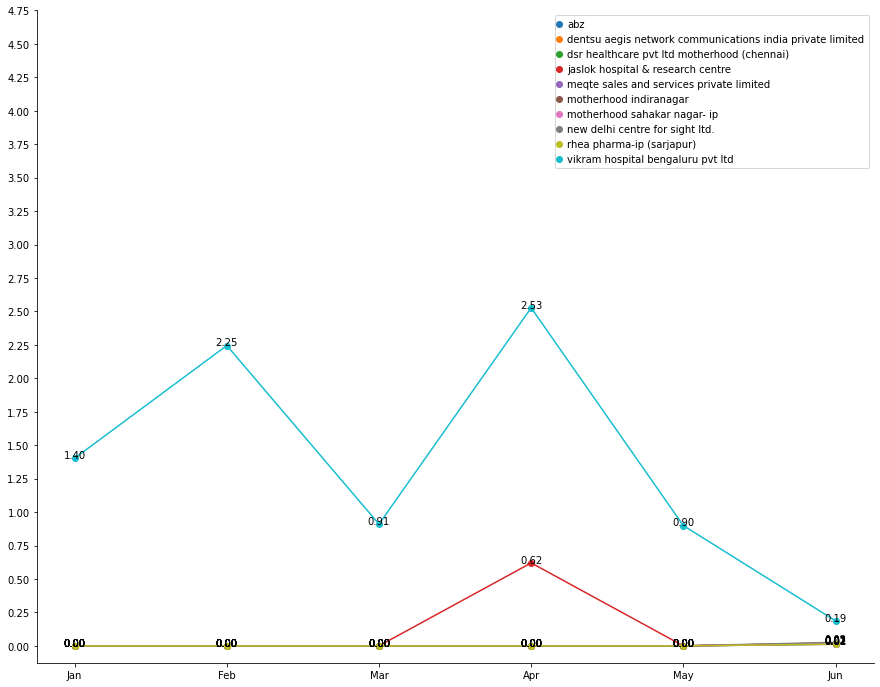

In [136]:
fig=plt.figure(figsize=(15,12))
for i in list1:
    ax1=plt.subplot(111)
    ax1.plot(list(d1["Month Name"]),d1["Order Value"][i],'o-',label=i)
    ax1.legend(loc=1, numpoints=1, handlelength=0,ncol=1)
    for a, v in enumerate(d1["Order Value"][i]):
        ax1.text(a, v, "%.2f" %v, ha="center")
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    plt.yticks(np.arange(0, 5, 0.25))

#plt.title("Top 10 Customers Trend Analysis",loc='left',fontsize=30, color="red")
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\Top 10 Cust in each month by Order Value.png',bbox_inches='tight',dpi=100)
#plt.show()

In [137]:
fig=go.Figure()
for i in list1:
    fig.add_trace(go.Scatter(x=list(d1["Month Name"]), y=d1["Order Value"][i],
                    mode='lines+markers',text=d1["Order Value"][i],
                    name=i))
    fig.update_traces(texttemplate='%{text:.2s}')
    fig.update_layout(legend_orientation="h")
for a, v in enumerate(d1["Order Value"][i]):
    ax1.text(a, v, "%f" %v, ha="center")
#fig.update_yaxes(range=[0,0.5])
#fig.write_image(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\Top 10 Cust in each month by Order Value.png')
fig.show()

# Top 2 customers in each category and their contribution to overall value

In [138]:
newdata_current_month.head()

Order ID Order Date Order Status Organic/Inorganic BDE Name  \
1772  1045010214 2020-06-01      pending           Organic        -   
1773  1045010214 2020-06-01      pending           Organic        -   
1774  1045010214 2020-06-01      pending           Organic        -   
1775  1045010214 2020-06-01      pending           Organic        -   
1776  1045010215 2020-06-01      pending           Organic        -   

     Department Vertical Customer Name             Customer Email  \
1772          -  Organic          qais  centreofholy786@gmail.com   
1773          -  Organic          qais  centreofholy786@gmail.com   
1774          -  Organic          qais  centreofholy786@gmail.com   
1775          -  Organic          qais  centreofholy786@gmail.com   
1776          -  Organic         sahil       dr.monga11@gmail.com   

     Customer Telephone  ... Comment Tag Carrier type   Zone Shipment Date  \
1772        09419488474  ...       -   -            -  NORTH             -   
1773        09419488474  ...       -   -            -  NORTH             -   
1774        09419488474  ...       -   -            -  NORTH             -   
1775        09419488474  ...       -   -            -  NORTH             -   
1776         9914091211  ...       -   -            -  NORTH             -   

      Order Value  month  month_str  Customer_Name_tag  Period  
1772       638.24    6.0        Jun                  1     MTD  
1773       638.24    6.0        Jun                  1     MTD  
1774       638.24    6.0        Jun                  1     MTD  
1775       638.24    6.0        Jun                  1     MTD  
1776      1030.14    6.0        Jun                  0     MTD  

[5 rows x 37 columns]

In [139]:
df_current_10=pd.DataFrame(newdata_current_month.groupby(["Customer Category","Order ID","Customer Name","Customer Email"])["Order Value"].max()).reset_index()

In [140]:
df_current_10_1=pd.DataFrame(df_current_10.groupby(["Customer Category","Customer Name","Customer Email"])["Order Value"].sum().round(2)).reset_index().sort_values(by="Order Value",ascending=False)
Total_order_value=df_current_10_1["Order Value"].sum()
df_current_10_1["Contribution in %"]=((df_current_10_1["Order Value"]/Total_order_value)*100).round(2)
df_current_10_1

Customer Category                      Customer Name  \
90  Hospital / Medical Establishment  vikram hospital bengaluru pvt ltd   
89  Hospital / Medical Establishment  vikram hospital bengaluru pvt ltd   
67  Hospital / Medical Establishment    new delhi centre for sight ltd.   
59  Hospital / Medical Establishment             motherhood indiranagar   
53  Hospital / Medical Establishment  jaslok hospital & research centre   
..                               ...                                ...   
73  Hospital / Medical Establishment            prerna hospital limited   
93     Medical Suppliers / Resellers          bio trust medical devices   
29     Doctor / Medical Professional                   ms.rashmi chavda   
75  Hospital / Medical Establishment               qrg medicare limited   
25     Doctor / Medical Professional            dr. abantika mookherjee   

                         Customer Email  Order Value  Contribution in %  
90          purchase@vikramhospital.com   1432764.50              26.74  
89          pharmacy@vikramhospital.com    443042.62               8.27  
67     infohyderabad@centreforsight.net    265859.14               4.96  
59  sharana.basappa@motherhoodindia.com    217780.39               4.06  
53              info@jaslokhospital.net    211820.00               3.95  
..                                  ...          ...                ...  
73              vishramdessai@yahoo.com       599.20               0.01  
93             biotrustdevice@gmail.com       504.00               0.01  
29             chavdarashmi98@gmail.com       504.00               0.01  
75           bharat.pal@qrgmedicare.com       409.64               0.01  
25                 abantika19@gmail.com       367.50               0.01  

[116 rows x 5 columns]

In [141]:
df_current_10_2=pd.DataFrame(df_current_10_1.groupby(["Customer Category"])["Order Value"].nlargest(2)).reset_index()
df_current_10_2

Customer Category  level_1  Order Value
0                      Dental Center       11     59965.00
1                      Dental Center        9     16999.99
2      Doctor / Medical Professional       32     81900.00
3      Doctor / Medical Professional       18     20071.80
4                            General       38    119392.00
5                            General       39     89069.00
6           Healthcare Professionals       41      1913.96
7   Hospital / Medical Establishment       90   1432764.50
8   Hospital / Medical Establishment       89    443042.62
9      Medical Suppliers / Resellers      103    128548.00
10     Medical Suppliers / Resellers      100     67200.00
11  Proprietary / Partnership / Comp      113      8761.91
12  Proprietary / Partnership / Comp      114      6961.00
13    Trade Buyers/Resellers/Distrib      115      6424.48

In [142]:
df_current_10_2.drop("level_1",axis=1,inplace=True)
df_current_10_2

Customer Category  Order Value
0                      Dental Center     59965.00
1                      Dental Center     16999.99
2      Doctor / Medical Professional     81900.00
3      Doctor / Medical Professional     20071.80
4                            General    119392.00
5                            General     89069.00
6           Healthcare Professionals      1913.96
7   Hospital / Medical Establishment   1432764.50
8   Hospital / Medical Establishment    443042.62
9      Medical Suppliers / Resellers    128548.00
10     Medical Suppliers / Resellers     67200.00
11  Proprietary / Partnership / Comp      8761.91
12  Proprietary / Partnership / Comp      6961.00
13    Trade Buyers/Resellers/Distrib      6424.48

In [143]:
df_current_10_3=pd.merge(df_current_10_2,df_current_10_1,on="Order Value",how="inner")
df_current_10_3

Customer Category_x  Order Value  \
0                      Dental Center     59965.00   
1                      Dental Center     16999.99   
2      Doctor / Medical Professional     81900.00   
3      Doctor / Medical Professional     20071.80   
4                            General    119392.00   
5                            General     89069.00   
6           Healthcare Professionals      1913.96   
7   Hospital / Medical Establishment   1432764.50   
8   Hospital / Medical Establishment    443042.62   
9      Medical Suppliers / Resellers    128548.00   
10     Medical Suppliers / Resellers     67200.00   
11  Proprietary / Partnership / Comp      8761.91   
12  Proprietary / Partnership / Comp      6961.00   
13    Trade Buyers/Resellers/Distrib      6424.48   

                 Customer Category_y  \
0                      Dental Center   
1                      Dental Center   
2      Doctor / Medical Professional   
3      Doctor / Medical Professional   
4                            General   
5                            General   
6           Healthcare Professionals   
7   Hospital / Medical Establishment   
8   Hospital / Medical Establishment   
9      Medical Suppliers / Resellers   
10     Medical Suppliers / Resellers   
11  Proprietary / Partnership / Comp   
12  Proprietary / Partnership / Comp   
13    Trade Buyers/Resellers/Distrib   

                               Customer Name                 Customer Email  \
0                         duti tech solution   chatterjeedebaprem@gmail.com   
1                                 dr sripada     drshripadan@rediffmail.com   
2                              russell mehta     russell.mehta@rosyblue.com   
3                                         dr     madhurya_19@rediffmail.com   
4             hippocrat biotech private ltd.     hippocratbiotech@gmail.com   
5           sastasundar heal thbuddy limited       skchhipa@sastasundar.com   
6                                 kts prasad          prasadkts95@gmail.com   
7          vikram hospital bengaluru pvt ltd    purchase@vikramhospital.com   
8          vikram hospital bengaluru pvt ltd    pharmacy@vikramhospital.com   
9   meqte sales and services private limited           meqtesales@gmail.com   
10                 kubera ganapathy pharmacy          Kgauditdept@gmail.com   
11                 kuldeep engineering works           karekar168@gmail.com   
12                         prashant n karnik  anil.mohanty@medikabazaar.com   
13                                      ajay     omenterprisebngn@gmail.com   

    Contribution in %  
0                1.12  
1                0.32  
2                1.53  
3                0.37  
4                2.23  
5                1.66  
6                0.04  
7               26.74  
8                8.27  
9                2.40  
10               1.25  
11               0.16  
12               0.13  
13               0.12

In [144]:
df_Category_Cust_2=pd.DataFrame(df_current_10_3,columns=["Customer Category_x","Customer Category_y","Customer Name","Customer Email","Order Value","Contribution in %"]).drop("Customer Category_y",axis=1)

In [145]:
df_Category_Cust_2=df_Category_Cust_2.rename(columns={"Customer Category_x":"Category","Order Value":"Amount"})
df_Category_Cust_2

Category  \
0                      Dental Center   
1                      Dental Center   
2      Doctor / Medical Professional   
3      Doctor / Medical Professional   
4                            General   
5                            General   
6           Healthcare Professionals   
7   Hospital / Medical Establishment   
8   Hospital / Medical Establishment   
9      Medical Suppliers / Resellers   
10     Medical Suppliers / Resellers   
11  Proprietary / Partnership / Comp   
12  Proprietary / Partnership / Comp   
13    Trade Buyers/Resellers/Distrib   

                               Customer Name                 Customer Email  \
0                         duti tech solution   chatterjeedebaprem@gmail.com   
1                                 dr sripada     drshripadan@rediffmail.com   
2                              russell mehta     russell.mehta@rosyblue.com   
3                                         dr     madhurya_19@rediffmail.com   
4             hippocrat biotech private ltd.     hippocratbiotech@gmail.com   
5           sastasundar heal thbuddy limited       skchhipa@sastasundar.com   
6                                 kts prasad          prasadkts95@gmail.com   
7          vikram hospital bengaluru pvt ltd    purchase@vikramhospital.com   
8          vikram hospital bengaluru pvt ltd    pharmacy@vikramhospital.com   
9   meqte sales and services private limited           meqtesales@gmail.com   
10                 kubera ganapathy pharmacy          Kgauditdept@gmail.com   
11                 kuldeep engineering works           karekar168@gmail.com   
12                         prashant n karnik  anil.mohanty@medikabazaar.com   
13                                      ajay     omenterprisebngn@gmail.com   

        Amount  Contribution in %  
0     59965.00               1.12  
1     16999.99               0.32  
2     81900.00               1.53  
3     20071.80               0.37  
4    119392.00               2.23  
5     89069.00               1.66  
6      1913.96               0.04  
7   1432764.50              26.74  
8    443042.62               8.27  
9    128548.00               2.40  
10    67200.00               1.25  
11     8761.91               0.16  
12     6961.00               0.13  
13     6424.48               0.12

In [174]:
d=df_Category_Cust_2.style.applymap(lambda x: f"color:{'red'if isinstance(x,float) else 'black'}")


In [175]:
d

In [148]:
type(d)

pandas.io.formats.style.Styler

# Customers By State

In [149]:
df_state_1=pd.DataFrame(newdata_current_month.groupby(["State"])["Order ID"].nunique()).reset_index()
#df_state_1

In [150]:
df_state_2=pd.DataFrame(newdata_current_month.groupby(["State","Order ID"])["Order Value"].max()).reset_index()
#df_state_2

In [151]:
#df_state_2[df_state_2["State"]=="ASSAM"]

In [152]:
df_state_3=pd.DataFrame(df_state_2.groupby(["State"])["Order Value"].sum().round()).reset_index()
#df_state_3

In [153]:
df_state_4=pd.DataFrame(newdata_current_month.groupby(["State"])["Customer Name"].nunique()).reset_index()
#df_state_4

In [154]:
df_state_5=pd.merge(df_state_3,df_state_1,on="State",how="inner")
#df_state_5

In [155]:
df_state=pd.merge(df_state_5,df_state_4,on="State",how="inner")
#df_state

In [156]:
df_state=df_state.rename(columns={"Order Value":"Amount","Order ID":"Orders","Customer Name":"Customers"})
df_state=df_state.sort_values(by="Amount",ascending=False)
df_state_amount=df_state["Amount"].sum()
df_state_amount
df_state["Contribution in %"]=((df_state["Amount"]/df_state_amount)*100).round(2)
df_state


State     Amount  Orders  Customers  Contribution in %
7           KARNATAKA  2705922.0      32         11              50.50
9         MAHARASHTRA   672358.0      25         22              12.55
13         TAMIL NADU   590890.0      18         14              11.03
17        WEST BENGAL   285656.0      30         20               5.33
14          TELANGANA   276521.0       5          3               5.16
2               BIHAR   184029.0       6          6               3.43
8              KERALA   177802.0       2          1               3.32
1               ASSAM   110466.0      11          8               2.06
5             HARYANA   105626.0       6          4               1.97
3               DELHI    94634.0       5          2               1.77
4             GUJARAT    72094.0       8          7               1.35
0      ANDHRA PRADESH    25062.0       1          1               0.47
10             ORISSA    22689.0       6          6               0.42
12          RAJASTHAN    21512.0       4          4               0.40
15            TRIPURA     9262.0       1          1               0.17
16      UTTAR PRADESH     2596.0       1          1               0.05
11             PUNJAB     1030.0       1          1               0.02
6   JAMMU AND KASHMIR      638.0       1          1               0.01

In [157]:
df_state_currentMonth=df_state.style.applymap(lambda x: f"color:{'red'if isinstance(x,(float,int)) else 'black'}")


In [158]:
df_state_currentMonth

In [159]:
 #(df_state_currentMonth.transform()).toarray()

In [160]:
#pd.DataFrame(data=df_state_currentMonth)

In [161]:
df_state.columns

Index(['State', 'Amount', 'Orders', 'Customers', 'Contribution in %'], dtype='object')

In [162]:
df_orders

Customer Category Order Count Order Value     %  \
Period                                          LMTD        LMTD  LMTD   
0                          Dental Center       183.0   7089963.0   5.0   
1          Doctor / Medical Professional       303.0  12377740.0   9.0   
2                                General        37.0   3991848.0   3.0   
3               Healthcare Professionals         5.0    504779.0   0.0   
4       Hospital / Medical Establishment       630.0  73749020.0  55.0   
5          Medical Suppliers / Resellers       266.0  29110246.0  22.0   
6       Proprietary / Partnership / Comp        54.0   4839298.0   4.0   
7         Trade Buyers/Resellers/Distrib        32.0   1232348.0   1.0   
8                                 Vendor         0.0         0.0   0.0   
9                           Veterinarian         5.0     10097.0   0.0   
10                     Veterinary clinic         1.0      3080.0   0.0   
11                   Veterinary hospital         1.0    183284.0   0.0   

       Order Count Order Value     % Order Count  Order Value     %  
Period         MTD         MTD   MTD         YTD          YTD   YTD  
0             16.0    119190.0   2.0       734.0   27248649.0   3.0  
1             27.0    186535.0   3.0      1439.0   82492924.0   8.0  
2              4.0    238253.0   4.0       197.0   24369714.0   2.0  
3              1.0      1914.0   0.0        49.0    4905433.0   0.0  
4             85.0   4407051.0  82.0      3562.0  581373226.0  59.0  
5             27.0    383696.0   7.0      1083.0  212607779.0  22.0  
6              2.0     15723.0   0.0       178.0   11050956.0   1.0  
7              1.0      6424.0   0.0        88.0   39210403.0   4.0  
8              0.0         0.0   0.0         5.0     588000.0   0.0  
9              0.0         0.0   0.0         8.0     129820.0   0.0  
10             0.0         0.0   0.0         2.0       6171.0   0.0  
11             0.0         0.0   0.0         8.0     199607.0   0.0

In [163]:
df_orders.columns

MultiIndex([('Customer Category',     ''),
            (      'Order Count', 'LMTD'),
            (      'Order Value', 'LMTD'),
            (                '%', 'LMTD'),
            (      'Order Count',  'MTD'),
            (      'Order Value',  'MTD'),
            (                '%',  'MTD'),
            (      'Order Count',  'YTD'),
            (      'Order Value',  'YTD'),
            (                '%',  'YTD')],
           names=[None, 'Period'])

# Document Creation

In [164]:
doc=docx.Document()

header = doc.sections[0].header
htable=header.add_table(1,2,Inches(6)) 
htcells=htable.rows[0].cells
ht0=htcells[0].add_paragraph()
kh=ht0.add_run()
kh.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\9A logo.jpg',width=Inches(1))
ht1=htcells[1].add_paragraph(style="Heading 1")
kh1=ht1.add_run("Nine A Business Connect Pvt.Ltd",style="Heading 1 Char")
ht1.alignment = WD_ALIGN_PARAGRAPH.LEFT



sec_pr = doc.sections[0]._sectPr # get the section properties el
# create new borders el
pg_borders = OxmlElement('w:pgBorders')
# specifies how the relative positioning of the borders should be calculated
pg_borders.set(qn('w:offsetFrom'), 'page')
pg_borders.set(qn('w:display'), 'allpages')

for border_name in ('top', 'left', 'bottom', 'right',): # set all borders
    border_el = OxmlElement(f'w:{border_name}')
    border_el.set(qn('w:val'), 'single') # a single line
    border_el.set(qn('w:sz'), '4') # for meaning of  remaining attrs please look docs
    border_el.set(qn('w:space'), '24')
    border_el.set(qn('w:color'), 'auto')
    pg_borders.append(border_el) # register single border to border el
sec_pr.append(pg_borders) # apply border changes to section

#doc.add_heading("CUSTOMERS:",level=0)
table_title=doc.add_table(1,4)
shading_elm_0 = parse_xml(r'<w:shd {} w:fill="ca2d37"/>'.format(nsdecls('w')))
table_title.rows[0].cells[0]._tc.get_or_add_tcPr().append(shading_elm_0)
hdr_cell = table_title.rows[0].cells
run_title = hdr_cell[0].paragraphs[0].add_run('CUSTOMERS',style='Heading 1 Char')
run_title.bold = True
#run_title.underline = True

customer_count=(
    ('Total Cust:',str(newdata_last_month['Customer Name'].nunique()),str(newdata_current_month['Customer Name'].nunique()),str(YTD_newdata['Customer Name'].nunique())),
    ('New Cust:',str(new_customers_last_M)+" : "+new_customer_last_M_prop,str(new_customers_current_M)+" : "+new_customer_current_M_prop,str(new_customers_Y)+" : "+new_customer_Y_prop))
table = doc.add_table(rows=1, cols=4)

#shading_elm_1 = parse_xml(r'<w:shd {} w:fill="841f8b"/>'.format(nsdecls('w')))
#table.rows[0].cells[0]._tc.get_or_add_tcPr().append(shading_elm_1)

shading_elm_1 = parse_xml(r'<w:shd {} w:fill="8b1f26"/>'.format(nsdecls('w')))
table.rows[0].cells[1]._tc.get_or_add_tcPr().append(shading_elm_1)

shading_elm_2 = parse_xml(r'<w:shd {} w:fill="1F5C8B"/>'.format(nsdecls('w')))
table.rows[0].cells[2]._tc.get_or_add_tcPr().append(shading_elm_2)

shading_elm_3 = parse_xml(r'<w:shd {} w:fill="1f8b4e"/>'.format(nsdecls('w')))
table.rows[0].cells[3]._tc.get_or_add_tcPr().append(shading_elm_3)


hdr_cells = table.rows[0].cells
run = hdr_cells[0].paragraphs[0].add_run()
run.bold = True
run.underline = True
run1 = hdr_cells[1].paragraphs[0].add_run('LMTD')
run1.bold = True
run1.underline = True
run2 = hdr_cells[2].paragraphs[0].add_run('MTD')
run2.bold = True
run2.underline = True
run3 = hdr_cells[3].paragraphs[0].add_run('YTD')
run3.bold = True
run3.underline = True
#for c, l, m ,y in customer_count:
row_cells = table.add_row().cells
row_cells[0].text = customer_count[0][0]
row_cells[1].text = customer_count[0][1]
row_cells[2].text = customer_count[0][2]
row_cells[3].text = customer_count[0][3]
shading_elm_4 = parse_xml(r'<w:shd {} w:fill="1f8b84"/>'.format(nsdecls('w')))
row_cells[0]._tc.get_or_add_tcPr().append(shading_elm_4)

row_cells1 = table.add_row().cells
row_cells1[0].text = customer_count[1][0]
row_cells1[1].text = customer_count[1][1]
row_cells1[2].text = customer_count[1][2]
row_cells1[3].text = customer_count[1][3]
shading_elm_5 = parse_xml(r'<w:shd {} w:fill="8b1f5c"/>'.format(nsdecls('w')))
row_cells1[0]._tc.get_or_add_tcPr().append(shading_elm_5)


###################################################################################
doc_para1=doc.add_paragraph(style='Heading 1')
doc_para1.add_run("For Business Unit:",style='Intense Reference').bold = True       
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\customers_pie1.png', width=Inches(6.5),height=Inches(5))


############################################################
records=(
    ("Total Value:",str((newdata_current_month_oldCust1["Order Value"].sum()/100000).round(2))+""+"Cr"+" : "+str(old_cust_prop)+""+"%",str((newdata_current_month_newCust1["Order Value"].sum()/100000).round(2))+""+"Cr"+" : "+str(new_cust_prop)+""+"%")
)
table1=doc.add_table(rows=1,cols=3)

shading_elm_1 = parse_xml(r'<w:shd {} w:fill="ca2d37"/>'.format(nsdecls('w')))
table1.rows[0].cells[1]._tc.get_or_add_tcPr().append(shading_elm_1)

shading_elm_2 = parse_xml(r'<w:shd {} w:fill="2dcac0"/>'.format(nsdecls('w')))
table1.rows[0].cells[2]._tc.get_or_add_tcPr().append(shading_elm_2)


hdr_cells=table1.rows[0].cells
run = hdr_cells[0].paragraphs[0].add_run('VALUE:')
run.bold = True
run.underline = True
run1 = hdr_cells[1].paragraphs[0].add_run('Existing Customers')
run1.bold = True
run1.underline = True
run2 = hdr_cells[2].paragraphs[0].add_run('New Customers')
run2.bold = True
run2.underline = True

row_cells = table1.add_row().cells
row_cells[0].text = records[0]
row_cells[1].text = records[1]
row_cells[2].text = records[2]
shading_elm_3 = parse_xml(r'<w:shd {} w:fill="ca722d"/>'.format(nsdecls('w')))
row_cells[0]._tc.get_or_add_tcPr().append(shading_elm_3)


doc.add_page_break()
################################################################################################
doc_para2=doc.add_paragraph(style='Heading 1')
doc_para2.add_run("Top 10 Customers by Value:",style='Intense Reference').bold = True
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\Top 10 Cust by Order Value.png', width=Inches(7))
#######################################################################################################
doc.add_page_break()
doc_para3=doc.add_paragraph(style='Heading 1')
doc_para3.add_run("Top 10 Customers Trend Analysis:",style='Intense Reference').bold = True
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\Top 10 Cust in each month by Order Value.png', width=Inches(6.5),height=Inches(6))
########################################################################################################
doc.add_page_break()

doc_para4=doc.add_paragraph(style='Heading 1')
doc_para4.add_run("Top 10 Customers in each category and their contribution to overall value:",style='Intense Reference').bold = True
t = doc.add_table(rows=(df_Category_Cust_2.shape[0]+1), cols=df_Category_Cust_2.shape[1],style='Table Grid')
for j in range(df_Category_Cust_2.shape[-1]):
    t.cell(0,j).text = df_Category_Cust_2.columns[j]
    shading_elm_1 = parse_xml(r'<w:shd {} w:fill="2d85ca"/>'.format(nsdecls('w')))
    t.cell(0,j)._tc.get_or_add_tcPr().append(shading_elm_1)
for i in range(df_Category_Cust_2.shape[0]):
    for j in range(df_Category_Cust_2.shape[-1]):
        t.cell(i+1,j).text = str(df_Category_Cust_2.values[i,j])
        
doc.add_page_break()

doc_para5=doc.add_paragraph(style='Heading 1')
doc_para5.add_run("Customers By State:",style='Intense Reference').bold = True
t1 = doc.add_table(rows=(df_state.shape[0]+1), cols=df_state.shape[1],style='Table Grid')
for j in range(df_state.shape[-1]):
    t1.cell(0,j).text = df_state.columns[j]
    shading_elm_1 = parse_xml(r'<w:shd {} w:fill="2d85ca"/>'.format(nsdecls('w')))
    t1.cell(0,j)._tc.get_or_add_tcPr().append(shading_elm_1)
for i in range(df_state.shape[0]):
    for j in range(df_state.shape[-1]):
        t1.cell(i+1,j).text = str(df_state.values[i,j])
        
doc.add_page_break()

t2=doc.add_table(rows=(df_orders.shape[0]+1), cols=df_orders.shape[1],style="Table Grid")

for j in range(df_orders.shape[-1]):
    t2.cell(0,j).height=Cm(10)
    t2.cell(0,j).text=df_orders.columns[j]
    shading_elm_1 = parse_xml(r'<w:shd {} w:fill="2d85ca"/>'.format(nsdecls('w')))
    t2.cell(0,j)._tc.get_or_add_tcPr().append(shading_elm_1)
for i in range(df_orders.shape[0]):
    for j in range(df_orders.shape[-1]):
        t2.cell(i+1,j).text=str(df_orders.values[i,j])
#t1.style = 'ColorfulShading'
t2.style = 'Light Grid'
t.style='Light Grid'   
    
#for cell in t.rows[0].cells:
 #   cell.width = Cm(3)





doc.save(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\Medical E-Commerce Report1.docx')
    

###### Template Based

In [165]:
### Chart heading style
def chartStyle(run_style):
    run_style.bold = True 
    run_style_font=run_style.font
    run_style_font.size=Pt(14)
    run_style_font.name="Calibri"
    run_style_font.color.rgb=RGBColor(255,69,0)

##### Values style    
def values_style(value_run_style):
    font=value_run_style.font
    font.color.rgb=RGBColor(0x42, 0x24, 0xE9)
    


In [166]:
### table header row 
def table_header_cell(style):
    style.bold = True
    font=style.font
    font.color.rgb=RGBColor(0,0,139)
    font.size=Pt(12)
    font.name="Calibri"
    style.underline = True

In [168]:
doc=docx.Document(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\Medical_Report1.docx')


sec_pr = doc.sections[0]._sectPr # get the section properties el
# create new borders el
pg_borders = OxmlElement('w:pgBorders')
# specifies how the relative positioning of the borders should be calculated
pg_borders.set(qn('w:offsetFrom'), 'page')
pg_borders.set(qn('w:display'), 'allpages')

for border_name in ('top', 'left', 'bottom', 'right',): # set all borders
    border_el = OxmlElement(f'w:{border_name}')
    border_el.set(qn('w:val'), 'single') # a single line
    border_el.set(qn('w:sz'), '4') # for meaning of  remaining attrs please look docs
    border_el.set(qn('w:space'), '24')
    border_el.set(qn('w:color'), 'blue')
    pg_borders.append(border_el) # register single border to border el
sec_pr.append(pg_borders) # apply border changes to section

#doc.add_heading("CUSTOMERS:",level=1)
#doc_para0=doc.add_paragraph("CUSTOMERS",style='Title')
#doc_para0.add_run().bold = True 

table_title=doc.add_table(1,4)
#ca2d37
shading_elm_0 = parse_xml(r'<w:shd {} w:fill="FF8C00"/>'.format(nsdecls('w')))
table_title.rows[0].cells[0]._tc.get_or_add_tcPr().append(shading_elm_0)
hdr_cell = table_title.rows[0].cells
run_title = hdr_cell[0].paragraphs[0].add_run('CUSTOMERS',style='Heading 1 Char')
run_title.bold = True
run_title_font=run_title.font
run_title_font.size=Pt(16)
run_title_font.name="Calibri"
run_title_font.color.rgb=RGBColor(255,255,255)
#run_title.underline = True

######################################################################################
customer_count=(
    ('Total Cust:',str(newdata_last_month['Customer Name'].nunique()),str(newdata_current_month['Customer Name'].nunique()),str(YTD_newdata['Customer Name'].nunique())),
    ('New Cust:',str(new_customers_last_M)+" : "+new_customer_last_M_prop,str(new_customers_current_M)+" : "+new_customer_current_M_prop,str(new_customers_Y)+" : "+new_customer_Y_prop))
table = doc.add_table(rows=1, cols=4)

#shading_elm_1 = parse_xml(r'<w:shd {} w:fill="841f8b"/>'.format(nsdecls('w')))
#table.rows[0].cells[0]._tc.get_or_add_tcPr().append(shading_elm_1)

#shading_elm_1 = parse_xml(r'<w:shd {} w:fill="8b1f26"/>'.format(nsdecls('w')))
#table.rows[0].cells[1]._tc.get_or_add_tcPr().append(shading_elm_1)

#shading_elm_2 = parse_xml(r'<w:shd {} w:fill="1F5C8B"/>'.format(nsdecls('w')))
#table.rows[0].cells[2]._tc.get_or_add_tcPr().append(shading_elm_2)

#shading_elm_3 = parse_xml(r'<w:shd {} w:fill="1f8b4e"/>'.format(nsdecls('w')))
#table.rows[0].cells[3]._tc.get_or_add_tcPr().append(shading_elm_3)


hdr_cells = table.rows[0].cells
run = hdr_cells[0].paragraphs[0].add_run()

run1 = hdr_cells[1].paragraphs[0].add_run('LMTD')
table_header_cell(run1)

run2 = hdr_cells[2].paragraphs[0].add_run('MTD')
table_header_cell(run2)

run3 = hdr_cells[3].paragraphs[0].add_run('YTD')
table_header_cell(run3)

#for c, l, m ,y in customer_count:
#row_cells = table.add_row().cells
#row_cells[0].text = customer_count[0][0]
#row_cells[1].text = customer_count[0][1]
#row_cells[2].text = customer_count[0][2]
#row_cells[3].text = customer_count[0][3]
#shading_elm_4 = parse_xml(r'<w:shd {} w:fill="1f8b84"/>'.format(nsdecls('w')))
#row_cells[0]._tc.get_or_add_tcPr().append(shading_elm_4)
#font_totalCust=row_cells[0].text.paragraphs[0].rows[0].font
#font_totalCust.color.rgb=RGBColor(0x42, 0x24, 0xE9)

table_val = doc.add_table(rows=1, cols=4)
hdr_cells = table_val.rows[0].cells
run = hdr_cells[0].paragraphs[0].add_run(customer_count[0][0])
run.bold = True
font=run.font
font.color.rgb=RGBColor(255,69,0)
font.size=Pt(12)
font.name="Calibri"
run.underline = True

run1 = hdr_cells[1].paragraphs[0].add_run(customer_count[0][1])
values_style(run1)

run2 = hdr_cells[2].paragraphs[0].add_run(customer_count[0][2])
values_style(run2)

run3 = hdr_cells[3].paragraphs[0].add_run(customer_count[0][3])
values_style(run3)
##################################################################################

table_val1 = doc.add_table(rows=1, cols=4)
hdr_cells = table_val1.rows[0].cells
run = hdr_cells[0].paragraphs[0].add_run(customer_count[1][0])
run.bold = True
font=run.font
font.color.rgb=RGBColor(255,69,0)
font.size=Pt(12)
font.name="Calibri"
run.underline = True

run1 = hdr_cells[1].paragraphs[0].add_run(customer_count[1][1])
values_style(run1)

run2 = hdr_cells[2].paragraphs[0].add_run(customer_count[1][2])
values_style(run2)

run3 = hdr_cells[3].paragraphs[0].add_run(customer_count[1][3])
values_style(run3)


#row_cells1 = table.add_row().cells
#row_cells1[0].text = customer_count[1][0]
#row_cells1[1].text = customer_count[1][1]
#row_cells1[2].text = customer_count[1][2]
#row_cells1[3].text = customer_count[1][3]
#shading_elm_5 = parse_xml(r'<w:shd {} w:fill="8b1f5c"/>'.format(nsdecls('w')))
#row_cells1[0]._tc.get_or_add_tcPr().append(shading_elm_5)


###################################################################################
doc_para1=doc.add_paragraph(style='TOCHeading')
doc_para1_run=doc_para1.add_run("For Business Unit:",style='Intense Reference') 
chartStyle(doc_para1_run)
doc_para1_0=doc.add_paragraph()
doc_para1_0.add_run()
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\customers_pie1.png', width=Inches(7),height=Inches(4))


############################################################
records=(
    ("Total Value:",str((newdata_current_month_oldCust1["Order Value"].sum()/100000).round(2))+""+"Cr"+" : "+str(old_cust_prop)+""+"%",str((newdata_current_month_newCust1["Order Value"].sum()/100000).round(2))+""+"Cr"+" : "+str(new_cust_prop)+""+"%")
)
table1=doc.add_table(rows=1,cols=3)

#shading_elm_1 = parse_xml(r'<w:shd {} w:fill="ca2d37"/>'.format(nsdecls('w')))
#table1.rows[0].cells[1]._tc.get_or_add_tcPr().append(shading_elm_1)

#shading_elm_2 = parse_xml(r'<w:shd {} w:fill="2dcac0"/>'.format(nsdecls('w')))
#table1.rows[0].cells[2]._tc.get_or_add_tcPr().append(shading_elm_2)


hdr_cells=table1.rows[0].cells
run = hdr_cells[0].paragraphs[0].add_run()

run1 = hdr_cells[1].paragraphs[0].add_run('Existing Customers')
table_header_cell(run1)

run2 = hdr_cells[2].paragraphs[0].add_run('New Customers')
table_header_cell(run2)

#row_cells = table1.add_row().cells
#row_cells[0].text = records[0]
#row_cells[1].text = records[1]
#row_cells[2].text = records[2]
#shading_elm_3 = parse_xml(r'<w:shd {} w:fill="ca722d"/>'.format(nsdecls('w')))
#row_cells[0]._tc.get_or_add_tcPr().append(shading_elm_3)
table1_val=doc.add_table(rows=1,cols=3)
hdr_cells=table1_val.rows[0].cells
run = hdr_cells[0].paragraphs[0].add_run(records[0])
run.bold = True
font=run.font
font.color.rgb=RGBColor(255,69,0)
font.size=Pt(12)
font.name="Calibri"
run.underline = True

run1 = hdr_cells[1].paragraphs[0].add_run(records[1])
values_style(run1)

run2 = hdr_cells[2].paragraphs[0].add_run(records[2])
values_style(run2)







#doc.add_page_break()
################################################################################################
doc_para2=doc.add_paragraph(style='TOCHeading')
doc_para2_run=doc_para2.add_run("Top 10 Customers by Value:",style='Intense Reference')
chartStyle(doc_para2_run)
doc_para2_0=doc.add_paragraph()
doc_para2_0.add_run()
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\Top 10 Cust by Order Value.png', width=Inches(7))
#######################################################################################################
doc.add_page_break()
doc_para3=doc.add_paragraph(style='TOCHeading')
doc_para3_run=doc_para3.add_run("Top 10 Customers Trend Analysis:",style='Intense Reference')
chartStyle(doc_para3_run)
doc_para3_0=doc.add_paragraph()
doc_para3_0.add_run()
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\Top 10 Cust in each month by Order Value.png', width=Inches(6.5),height=Inches(6))
########################################################################################################
doc.add_page_break()

doc_para4=doc.add_paragraph(style='TOCHeading')
doc_para4_run=doc_para4.add_run("Top 10 Customers in each category and their contribution to overall value:",style='Intense Reference')
chartStyle(doc_para4_run)
doc_para4_0=doc.add_paragraph()
doc_para4_0.add_run()

t = doc.add_table(rows=(df_Category_Cust_2.shape[0]+1), cols=df_Category_Cust_2.shape[1],style='Table Grid')
for j in range(df_Category_Cust_2.shape[-1]):
    t.cell(0,j).text = df_Category_Cust_2.columns[j]
    shading_elm_1 = parse_xml(r'<w:shd {} w:fill="2d85ca"/>'.format(nsdecls('w')))
    t.cell(0,j)._tc.get_or_add_tcPr().append(shading_elm_1)
for i in range(df_Category_Cust_2.shape[0]):
    for j in range(df_Category_Cust_2.shape[-1]):
        t.cell(i+1,j).text = str(df_Category_Cust_2.values[i,j])
        
doc.add_page_break()

doc_para5=doc.add_paragraph(style='TOCHeading')
doc_para5_run=doc_para5.add_run("Customers By State:",style='Intense Reference')
chartStyle(doc_para5_run)
doc_para5_0=doc.add_paragraph()
doc_para5_0.add_run()

t1 = doc.add_table(rows=(df_state.shape[0]+1), cols=df_state.shape[1],style='Table Grid')
for j in range(df_state.shape[-1]):
    t1.cell(0,j).text = df_state.columns[j]
    shading_elm_1 = parse_xml(r'<w:shd {} w:fill="2d85ca"/>'.format(nsdecls('w')))
    t1.cell(0,j)._tc.get_or_add_tcPr().append(shading_elm_1)
for i in range(df_state.shape[0]):
    for j in range(df_state.shape[-1]):
        t1.cell(i+1,j).text = str(df_state.values[i,j])
        
doc.add_page_break()

doc_para6=doc.add_paragraph(style='TOCHeading')
doc_para6_run=doc_para6.add_run("Customer Category Wise Order Details:",style='Intense Reference')
chartStyle(doc_para6_run)
doc_para6_0=doc.add_paragraph()
doc_para6_0.add_run()

t2=doc.add_table(rows=(df_orders.shape[0]+1), cols=(df_orders.shape[1]),style="Table Grid")

for j in range(df_orders.shape[-1]):
    #t2.cell(0,j).height=Cm(10)
    t2.cell(0,j).text=df_orders.columns[j]
    shading_elm_1 = parse_xml(r'<w:shd {} w:fill="2d85ca"/>'.format(nsdecls('w')))
    t2.cell(0,j)._tc.get_or_add_tcPr().append(shading_elm_1)
for i in range(df_orders.shape[0]):
    for j in range(df_orders.shape[-1]):
        t2.cell(i+1,j).text=str(df_orders.values[i,j])
        
#t2.cell(0,0).text = df_orders.columns

# write the index values to file
#t2.cell(1,0).text = df_orders.index.name

#for i, my_index in enumerate(df_orders.index):
     #t2.cell(i+2,0).text = my_index

#t1.style = 'ColorfulShading'
#t2.style = 'Light Grid'
#t.style='LightGrid'   
    
#for cell in t2.rows[0].cells:
    #cell.width = Cm(3)





doc.save(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\Medical E-Commerce Report.docx')
    

In [169]:
df_orders.columns

MultiIndex([('Customer Category',     ''),
            (      'Order Count', 'LMTD'),
            (      'Order Value', 'LMTD'),
            (                '%', 'LMTD'),
            (      'Order Count',  'MTD'),
            (      'Order Value',  'MTD'),
            (                '%',  'MTD'),
            (      'Order Count',  'YTD'),
            (      'Order Value',  'YTD'),
            (                '%',  'YTD')],
           names=[None, 'Period'])

In [170]:
df_orders

Customer Category Order Count Order Value     %  \
Period                                          LMTD        LMTD  LMTD   
0                          Dental Center       183.0   7089963.0   5.0   
1          Doctor / Medical Professional       303.0  12377740.0   9.0   
2                                General        37.0   3991848.0   3.0   
3               Healthcare Professionals         5.0    504779.0   0.0   
4       Hospital / Medical Establishment       630.0  73749020.0  55.0   
5          Medical Suppliers / Resellers       266.0  29110246.0  22.0   
6       Proprietary / Partnership / Comp        54.0   4839298.0   4.0   
7         Trade Buyers/Resellers/Distrib        32.0   1232348.0   1.0   
8                                 Vendor         0.0         0.0   0.0   
9                           Veterinarian         5.0     10097.0   0.0   
10                     Veterinary clinic         1.0      3080.0   0.0   
11                   Veterinary hospital         1.0    183284.0   0.0   

       Order Count Order Value     % Order Count  Order Value     %  
Period         MTD         MTD   MTD         YTD          YTD   YTD  
0             16.0    119190.0   2.0       734.0   27248649.0   3.0  
1             27.0    186535.0   3.0      1439.0   82492924.0   8.0  
2              4.0    238253.0   4.0       197.0   24369714.0   2.0  
3              1.0      1914.0   0.0        49.0    4905433.0   0.0  
4             85.0   4407051.0  82.0      3562.0  581373226.0  59.0  
5             27.0    383696.0   7.0      1083.0  212607779.0  22.0  
6              2.0     15723.0   0.0       178.0   11050956.0   1.0  
7              1.0      6424.0   0.0        88.0   39210403.0   4.0  
8              0.0         0.0   0.0         5.0     588000.0   0.0  
9              0.0         0.0   0.0         8.0     129820.0   0.0  
10             0.0         0.0   0.0         2.0       6171.0   0.0  
11             0.0         0.0   0.0         8.0     199607.0   0.0

In [171]:
doc=docx.Document(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\Medical_Report1.docx')
t = doc.add_table(rows=(d.shape[0]+1), cols=d.shape[1],style='Table Grid')
for j in range(d.shape[-1]):
    t.cell(0,j).text = d.columns[j]
    shading_elm_1 = parse_xml(r'<w:shd {} w:fill="2d85ca"/>'.format(nsdecls('w')))
    t.cell(0,j)._tc.get_or_add_tcPr().append(shading_elm_1)
for i in range(d.shape[0]):
    for j in range(d.shape[-1]):
        t.cell(i+1,j).text = str(d.values[i,j])
        
doc.save(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\Medical Ecommerce\M1.docx')


AttributeError: 'Styler' object has no attribute 'shape'